In [22]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
import scipy
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [24]:
y, sr = librosa.load('wav_files/82_Mbalax.wav', sr = 22050) # Use the default sampling rate of 22,050 Hz



In [25]:
Audio(y, rate = sr)

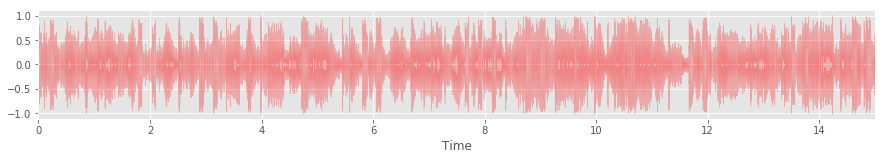

In [26]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'red')

### Part I: Time Domain Features

1) Statistical moments calculated on the raw audio

In [27]:
print('Signal mean = {:.2f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.2f}'.format(np.std(y)))
print('Signal skewness = {:.2f}'.format(scipy.stats.skew(abs(y))))
print('Signal kurtosis = {:.2f}'.format(scipy.stats.kurtosis(y)))

Signal mean = 0.23
Signal std dev = 0.30
Signal skewness = 1.25
Signal kurtosis = 0.54


2) Zero crossing rate

ZCR mean = 0.08
ZCR std dev = 0.04


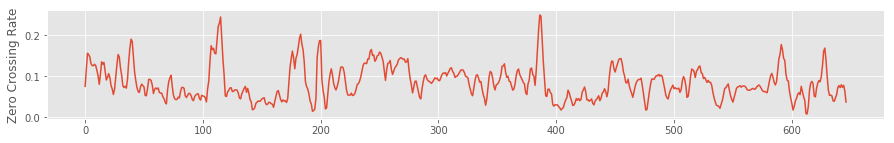

In [8]:
# Add a small constant before computing the zero crossing rate to disregard unwanted silence 'noise'
zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
plt.figure(figsize=(15,2))
plt.plot(zcr)
plt.ylabel('Zero Crossing Rate')
print('ZCR mean = {:.2f}'.format(np.mean(zcr)))
print('ZCR std dev = {:.2f}'.format(np.std(zcr)))


3) Root Mean Squared Energy

RMSE mean = 0.24
RMSE std dev = 0.11


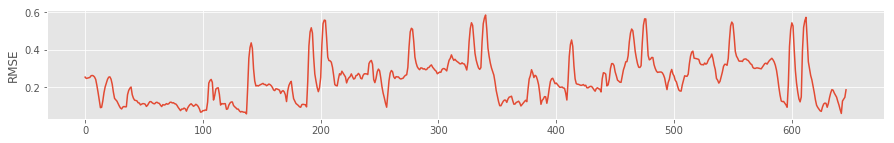

In [9]:
rmse = librosa.feature.rmse(y + 0.0001)[0]
plt.figure(figsize=(15,2))
plt.plot(rmse)
plt.ylabel('RMSE')
print('RMSE mean = {:.2f}'.format(np.mean(rmse)))
print('RMSE std dev = {:.2f}'.format(np.std(rmse)))

### Part II: Spectral Features

1) Spectral Centroid: frequency area around which most of the signal energy concentrates<br>
$f_c = \frac{\Sigma_k S(k)f(k)}{\Sigma_k S(k)}$<br>
where  S(k) is the spectral magnitude at frequency bin  k <br>
f(k) is the frequency at bin  k

Spectral Centroid mean = 2160.37
Spectral Centroid std dev = 742.31


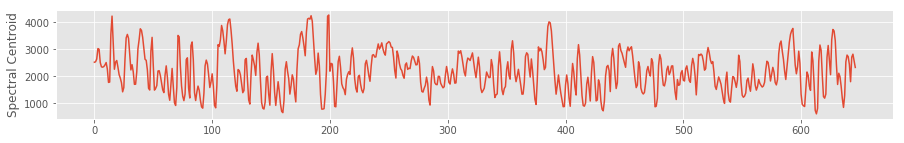

In [10]:
spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_centroids)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_centroids)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_centroids)))

2) Spectral Band-width: Other moments calculated around the spectral centroid <br>
$f_c = (\Sigma_k S(k)f(k) - f_c)^\frac{1}{p}$ <br>
When  p=2 this is like a weighted standard deviation.

Spectral Bandwidth-2 mean = 2505.08
Spectral Bandwidth-2 std dev = 498.11
Spectral Bandwidth-3 mean = 3108.81
Spectral Bandwidth-3 std dev = 392.47
Spectral Bandwidth-4 mean = 3654.38
Spectral Bandwidth-4 std dev = 319.54


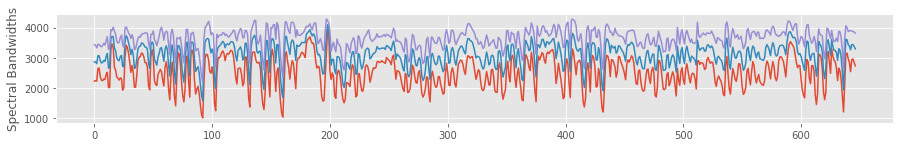

In [11]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_bandwidth_2)
plt.plot(spectral_bandwidth_3)
plt.plot(spectral_bandwidth_4)
plt.ylabel('Spectral Bandwidths')
print('Spectral Bandwidth-2 mean = {:.2f}'.format(np.mean(spectral_bandwidth_2)))
print('Spectral Bandwidth-2 std dev = {:.2f}'.format(np.std(spectral_bandwidth_2)))
print('Spectral Bandwidth-3 mean = {:.2f}'.format(np.mean(spectral_bandwidth_3)))
print('Spectral Bandwidth-3 std dev = {:.2f}'.format(np.std(spectral_bandwidth_3)))
print('Spectral Bandwidth-4 mean = {:.2f}'.format(np.mean(spectral_bandwidth_4)))
print('Spectral Bandwidth-4 std dev = {:.2f}'.format(np.std(spectral_bandwidth_4)))
# Highly Correlated features may cause issues in the model building

3) Spectral Contrast: considers the spectral peak, the spectral valley, and their difference in each frequency subband. Usually, 6 sub-bands

Means [18.77016217 15.19202147 19.57468696 19.67217458 18.90486832 19.26719331
 30.82861023]
Std devs [4.8213434  4.09226036 4.33302587 4.55268305 4.28834702 5.02674132
 2.76297802]


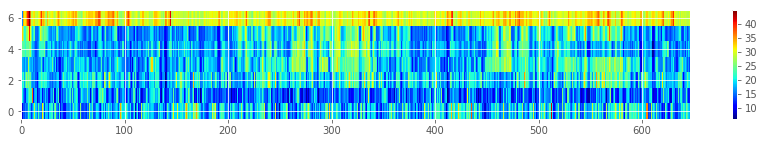

In [12]:
# Frequency cutoff for the first bin `[0, fmin]`
# Subsequent bins will cover `[fmin, 2*fmin]`, `[2*fmin, 4*fmin]
# Bins are on log scale
spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
plt.figure(figsize=(15,2))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(spectral_contrast, axis=1)) # Values are on dB scale
print('Std devs', np.std(spectral_contrast, axis=1)) 

4) Spectral Roll-off: the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

Spectral Centroid mean = 4770.07
Spectral Centroid std dev = 1858.96


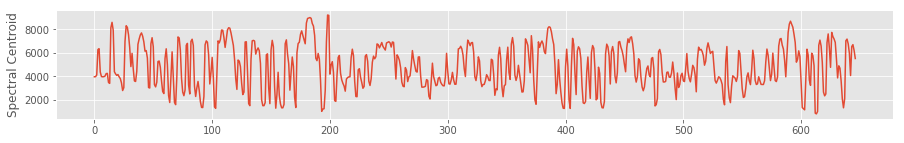

In [13]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_rolloff)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_rolloff)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_rolloff)))

# What would be a good roll_percent to use?

5) Mel-Frequency Cepstral Coefficients

In [ ]:
mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
plt.figure(figsize=(15,2))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(mfccs, axis=1)) 
print('Std devs', np.std(mfccs, axis=1)) 

6) Chroma Features (STFT)
A chroma vector (Wikipedia) is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

In [ ]:
chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_stft, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_stft, axis=1)) 
print('Std devs', np.std(chroma_stft, axis=1)) 

7) Chroma Features (CQT)

In [ ]:
chroma_cqt = librosa.feature.chroma_cqt(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cqt, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cqt, axis=1)) 
print('Std devs', np.std(chroma_cqt, axis=1)) 

8) Chroma Features (CENS) - Chroma energy normalized statistics

In [ ]:
chroma_cens = librosa.feature.chroma_cens(y, sr=sr, hop_length=512)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cens, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cens, axis=1)) 
print('Std devs', np.std(chroma_cens, axis=1)) 

In [14]:
import os
import numpy as np
import pandas as pd
import scipy
import librosa
from tqdm import tqdm

In [16]:
WAV_DIR = 'wav_files/'
wav_files = os.listdir(WAV_DIR)[:10]

In [ ]:
col_names = ['file_name', 'signal_mean', 'signal_std', 'signal_skew', 'signal_kurtosis', 
             'zcr_mean', 'zcr_std', 'rmse_mean', 'rmse_std', 'tempo',
             'spectral_centroid_mean', 'spectral_centroid_std',
             'spectral_bandwidth_2_mean', 'spectral_bandwidth_2_std',
             'spectral_bandwidth_3_mean', 'spectral_bandwidth_3_std',
             'spectral_bandwidth_4_mean', 'spectral_bandwidth_4_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(7)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(7)] + \
            ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)] + \
            ['chroma_stft_' + str(i+1) + '_mean' for i in range(12)] + \
            ['chroma_stft_' + str(i+1) + '_std' for i in range(12)] 
            
df = pd.DataFrame(columns=col_names)

In [ ]:
for f in tqdm(wav_files[:10]):
    try:
        # Read wav-file
        y, sr = librosa.load(WAV_DIR+f, sr = 22050)
        
        feature_list = [f]

        feature_list.append(np.mean(abs(y)))
        feature_list.append(np.std(y))
        feature_list.append(scipy.stats.skew(abs(y)))
        feature_list.append(scipy.stats.kurtosis(y))

        zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
        feature_list.append(np.mean(zcr))
        feature_list.append(np.std(zcr))

        rmse = librosa.feature.rmse(y + 0.0001)[0]
        feature_list.append(np.mean(rmse))
        feature_list.append(np.std(rmse))
        
        tempo = librosa.beat.tempo(y, sr=sr)
        feature_list.extend(tempo)

        spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
        feature_list.append(np.mean(spectral_centroids))
        feature_list.append(np.std(spectral_centroids))

        spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
        spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
        spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
        feature_list.append(np.mean(spectral_bandwidth_2))
        feature_list.append(np.std(spectral_bandwidth_2))
        feature_list.append(np.mean(spectral_bandwidth_3))
        feature_list.append(np.std(spectral_bandwidth_3))
        feature_list.append(np.mean(spectral_bandwidth_3))
        feature_list.append(np.std(spectral_bandwidth_3))

        spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
        feature_list.extend(np.mean(spectral_contrast, axis=1))
        feature_list.extend(np.std(spectral_contrast, axis=1))

        spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
        feature_list.append(np.mean(spectral_rolloff))
        feature_list.append(np.std(spectral_rolloff))

        mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
        feature_list.extend(np.mean(mfccs, axis=1))
        feature_list.extend(np.std(mfccs, axis=1))

        chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
        feature_list.extend(np.mean(chroma_stft, axis=1))
        feature_list.extend(np.std(chroma_stft, axis=1))
        
        feature_list[1:] = np.round(feature_list[1:], decimals=3)
        
    except:
        pass
    
    df = df.append(pd.DataFrame(feature_list, index=col_names).transpose(), ignore_index=True)

# Save file
df.to_csv('df_features.csv', index=False)